# Dataset Information

The dataset is provided by UCI Machine Learning via Kaggle at https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset. The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content:

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=properly paid on time, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
# Let's first explore the data. Before we load the data, load all required libraries
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

#Load the CSV file into dataframeb
payment_data = pd.read_csv('data/UCI_Credit_Card.csv')
payment_data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#Some more visual checking
payment_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
payment_data.shape

(30000, 25)

In [6]:
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [7]:
print(payment_data['LIMIT_BAL'].min())
print(payment_data['LIMIT_BAL'].max())
print(payment_data['AGE'].min())
print(payment_data['AGE'].max())

10000.0
1000000.0
21
79


In [8]:
payment_data.groupby('default.payment.next.month').count()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,...,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364
1,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,...,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636


# Observations from above data

* Balance limit range from 10,000 to 1 million!
* Customers' age range from 21 to 79. 
* In the dataset given, 28% defaulted on the payment. That's much larger than 2.54% delinquency rate on credit card debt for all commercial banks in U.S.

In [9]:
payment_data.groupby('EDUCATION').count()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,10585,10585,10585,10585,10585,10585,10585,10585,10585,10585,...,10585,10585,10585,10585,10585,10585,10585,10585,10585,10585
2,14030,14030,14030,14030,14030,14030,14030,14030,14030,14030,...,14030,14030,14030,14030,14030,14030,14030,14030,14030,14030
3,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,...,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917
4,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
5,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280
6,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51


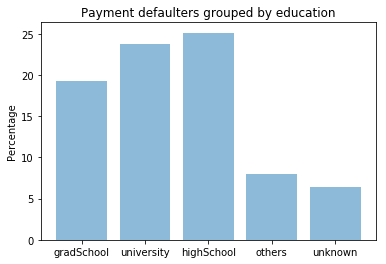

In [10]:
# Make a bar chart to understand if higher education equals to less default. Meaning that highly educated people earn more, 
# thus less chance of defaulting on credit card payment. Let's see if that assumption is true. 

import numpy as np

# EDUCATION column values 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown, 0=unknown 
# (0 is not given in the instructions) -- group all unknowns together

education_unknown = 0
education_graduate = 0
education_university = 0
education_highschool = 0
education_others = 0
default_unknown = 0
default_graduate = 0
default_university = 0
default_highschool = 0
default_others = 0

for index, row in payment_data.iterrows():    
    if (row['EDUCATION'] == 5):
            education_unknown+=1
            if (row['default.payment.next.month'] == 1):
                default_unknown+=1
    elif (row['EDUCATION'] == 1):
            education_graduate+=1
            if (row['default.payment.next.month'] == 1):
                default_graduate+=1
    elif (row['EDUCATION'] == 2):
            education_university+=1
            if (row['default.payment.next.month'] == 1):
                default_university+=1
    elif (row['EDUCATION'] == 3):
            education_highschool+=1
            if (row['default.payment.next.month'] == 1):
                default_highschool+=1
    else:
            education_others+=1
            if (row['default.payment.next.month'] == 1):
                default_others+=1

default_percentage_graduate = (default_graduate/education_graduate) * 100
default_percentage_university = (default_university/education_university) * 100
default_percentage_highschool = (default_highschool/education_highschool) * 100
default_percentage_others = (default_others/education_others) * 100
default_percentage_unknown = (default_unknown/education_unknown) * 100

education_level = ('gradSchool', 'university', 'highSchool', 'others', 'unknown')
y_pos = np.arange(len(education_level))
default_payment_percentage = (default_percentage_graduate, default_percentage_university, default_percentage_highschool, default_percentage_others, default_percentage_unknown)
 
plt.bar(y_pos, default_payment_percentage, align='center', alpha=0.5)
plt.xticks(y_pos, education_level)
plt.ylabel('Percentage')
plt.title('Payment defaulters grouped by education')
plt.show()

Findings from bar chart: Interestingly less educated people were more prompt in paying credit card bills!

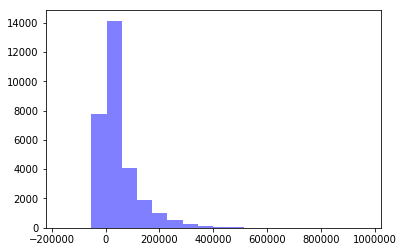

In [12]:
# Let's try histogram of one bill amount to see if it provides any insights
x = payment_data['BILL_AMT1']
num_bins = 20
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

No insights from above histogram. Same for other bill amounts as well. 

C:\Users\rammu_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


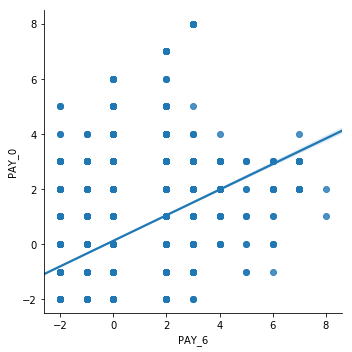

In [13]:
# Can we predict if a person is late in April would be most probably late in September as well? 
# Compare PAY_6 (payment status in April 2005) with PAY_0 (payment status in September 2005)

import seaborn as sns

# Plot a linear regression
sns.lmplot(x='PAY_6', y='PAY_0', data=payment_data)

# Display the plot
plt.show()

There is no definite correlation between repayment status in April vs September. However, we can interpret from above chart that most of the customers who were late in payment in April 2005 were late in September 2005 as well. 

{'whiskers': [<matplotlib.lines.Line2D at 0x16d3f0cc3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x16d3f0cca58>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d3f0cc080>],
 'medians': [<matplotlib.lines.Line2D at 0x16d3f0ccef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d3f0d6470>],
 'means': []}

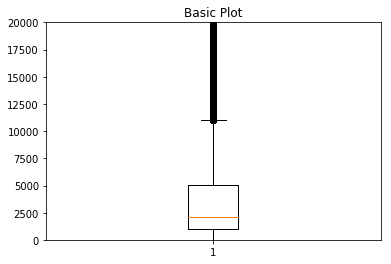

In [15]:
# Draw boxplot on couple of payment amounts to see if there is any pattern 

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.set(ylim=(10, 20000))
ax1.boxplot(payment_data['PAY_AMT1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16d3f121dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x16d3f12d4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d3f121a90>],
 'medians': [<matplotlib.lines.Line2D at 0x16d3f12db38>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d3f12de80>],
 'means': []}

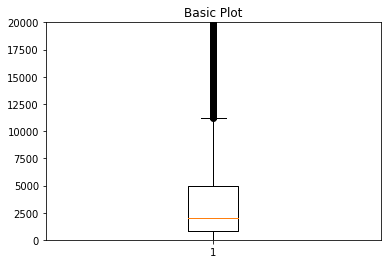

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.set(ylim=(10, 20000))
ax1.boxplot(payment_data['PAY_AMT2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16d3f181c50>,
 'caps': [<matplotlib.lines.Line2D at 0x16d3f18a320>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d3f181908>],
 'medians': [<matplotlib.lines.Line2D at 0x16d3f18a9b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d3f18acf8>],
 'means': []}

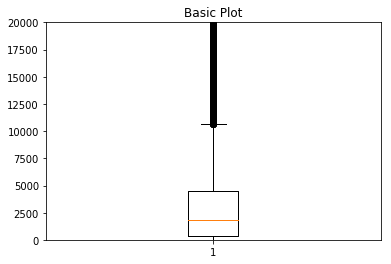

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.set(ylim=(10, 20000))
ax1.boxplot(payment_data['PAY_AMT3'])

Boxplots for pay_amt1. pay_amt2 and pay_amt3 look same in terms of non-outliers. 
I suspect that it's going to look the same for other pay_amt

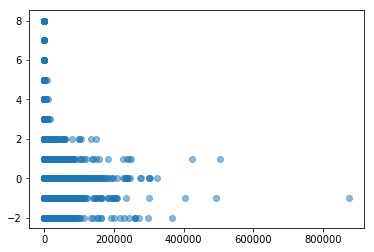

In [18]:
# Draw Scatterplot for payment status in September vs payment amount in September

# PAY_0: Repayment status in September, 2005 (-1=properly paid on time, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# default.payment.next.month: Default payment (1=yes, 0=no)
    
x = payment_data['PAY_AMT1']
y = payment_data['PAY_0']

plt.scatter(x, y, alpha=0.5)
plt.show()

As shown above when a customer pays less amount in a given month (especially less than 100,000 NT dollars), payment delays for that month goes up. This leads to an assumption that when the customer pays the card in full, there is less possibility of customer defaulting next month. It's only a speculation. There is no concrete evidence from above chart. 

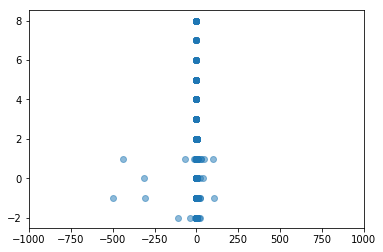

In [22]:
#PAY_0 - Repayment status in September 2005
#BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
#PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

x = payment_data['PAY_AMT1'] / payment_data['BILL_AMT2']
y = payment_data['PAY_0']

plt.scatter(x, y, alpha=0.5)
plt.xlim(-1000, 1000)
plt.show()

If a customer pays less than what he/she owes, does it indicate the possibility of default in current month? Looking at the chart above, it does not give any indication of that. 

Summary of insights to prepare the slide deck:

28% of Taiwan Bank customers defaulted in credit card payment. This is much larger than delinquency rate of 2.54% for U.S. banks. The data is captured in 2005 and we don't know what is the current default rate in Taiwan Bank.

Less educated people were more prompt in paying credit card bills on time.

Customers who were late in payment in April 2005 were late in September 2005 as well. This may lead to early detection of default and influence bank staff to take preventive measures to reduce the delinquency rate and loss.